<a href="https://colab.research.google.com/github/diepdangban/Datamining/blob/main/Data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [327]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython import get_ipython
from IPython.display import display

In [ ]:
# 1.
#five-number summary (tính giá trị nhỏ nhất – min, tứ phân vị thứ nhất – Q1, trung vị – median hay tứ phân vị thứ hai – Q2, tứ phân vị thứ ba – Q3, Giá trị lớn nhất – max)
#trung bình (average)
#trung vị (mean)
#độ lệch chuẩn (standard deviation),
#phương sai (variance).
#Lấy giá đóng cửa mỗi ngày trong bảng Lịch sử giá làm giá cổ phiếu ngày hôm đó, hãy vẽ biểu đồ theo dõi sự biến động giá cổ phiếu.

# Quan sát lịch sử giá cổ phiếu xem có những đợt tăng hay giảm giá cổ phiếu nào (bất thường nếu có),
# tìm hiểu background (bối cảnh lịch sử) của công ty và
# thị trường xem có những yếu tố nào có thể là nguyên nhân tác động tới giá cổ phiếu của công ty (chưa cần thực hiện phép tính toán).

# 2. Tiền xử lý dữ liệu
#◆ Tạo một bảng dữ liệu mới từ hai bảng đã cho.
#➢ Các cột dữ liệu trong bảng bao gồm các thông tin quan trọng cho việc tính toán và mô hình hóa thống kê từ hai bảng đã cho:
#➔ Dữ liệu lấy từ bảng Lịch sử giá (cần phải tính lại cho phù hợp nội dung của bảng Chỉ số tài chính): Mốc thời gian (quý/năm), Giá đóng cửa, Thay đổi giá, % thay đổi
#➔ Dữ liệu lấy từ bảng Chỉ số tài chính của công ty, bao gồm các chỉ số có khả năng ảnh hưởng tới giá cổ phiếu:
#Biên lợi nhuận gộp,
#Biên lợi nhuận ròng,
#P/E (tỷ lệ giá trên lợi nhuận Price to Earnings Ratio),
#EPS (lợi nhuận trên mỗi cổ phiếu Earnings Per Share),
#Tăng trưởng EPS, ROE (tỷ suất sinh lời trên vốn chủ sở hữu),
#tỷ lệ Nợ phải trả/Vốn chủ sở hữu,
#Khả năng thanh toán tổng quát,
#Vòng quay tài sản (Asset turnover ratio),
#Giá trị sổ sách (Book Value Per Share).

# Mỗi hàng là các chỉ số trong một quý.
# Cách lấy số liệu cho mỗi hàng:
#➔ Dữ liệu theo của quý đó trong Báo cáo Chỉ số tài chính của công ty.
#➔ Đối với dữ liệu về Lịch sử giá thì tính trung bình dữ liệu của ngày cuối cùng của quý đó và 14 ngày trước và sau ngày đó.
#➔ VD: Ngày cuối cùng của quý 4/2024 là ngày 31/12/2024, vậy để tính giá cổ phiếu của quý 4/2024 ta sẽ tính trung bình giá cổ phiếu từ ngày 17/12/2024 đến ngày 14/01/2025.
#➔ Như vậy thì các cột Thay đổi giá và % thay đổi cũng phải tính lại theo giá trị mới của quý.

##3. Lựa chọn các yếu tố nguy cơ (risk factors) tiềm năng cho mô hình tài chính
#Ở bước này, sinh viên sẽ sàng lọc ra một số yếu tố nguy cơ (risk factors) « tiềm năng » có thể gây ra biến động về giá cổ phiếu.
#Các factors này có thể đến từ trong chính công ty đó
#– các yếu tố nội tại (internal) – thể hiện bằng các chỉ số trong bảng báo cáo tài chính của công ty,
#hoặc từ thị trường bên ngoài tác động vào – ví dụ như các biến đổi trên thị trường chứng khoán thế giới, các ngành nghề liên quan, các yếu tố văn hóa chính trị, dịch bệnh,… khiến nền kinh tế bị trì trệ, v.v.
#Trong bài tập này chúng ta chỉ xét tới các yếu tố nội tại của chính công ty phát hành cổ phiếu.
#Để sàng lọc thì chúng ta cần tính độ tương quan Pearson của các chỉ số tài chính với giá cổ phiếu (dữ liệu được tạo ra ở mục 2).
#Từ đó đưa ra kết luận:
#➔ Giá cổ phiếu của công ty này có thể có mối quan hệ phụ thuộc vào những chỉ số tài chính nào?
###

In [309]:
Price_History_URL  = 'https://raw.githubusercontent.com/diepdangban/Datamining/refs/heads/main/Simplize_HPG_PriceHistory_20250315.xlsx'
Price_History_URL2 = 'https://raw.githubusercontent.com/diepdangban/Datamining/refs/heads/main/Price_history.csv'
Financial_Indicator_URL = 'https://raw.githubusercontent.com/diepdangban/Datamining/refs/heads/main/Simplize_HPG_FinancialIndicator_20250315.xlsx'

financial_indicatior = pd.read_excel(Financial_Indicator_URL, engine='openpyxl')
price_history = pd.read_excel(Price_History_URL, engine='openpyxl')
price_history2 = pd.read_csv(Price_History_URL2)

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [310]:
financial_indicatior = financial_indicatior.drop(financial_indicatior.index[:5])
financial_indicatior = financial_indicatior.drop(financial_indicatior.index[-7:])
financial_indicatior=financial_indicatior.T
financial_indicatior.columns=financial_indicatior.iloc[0]
financial_indicatior=financial_indicatior[1:]
financial_indicatior.drop_duplicates()
financial_indicatior.set_index(financial_indicatior.columns[0], inplace=True)
financial_indicatior = financial_indicatior.drop(columns=['Chỉ tiêu Báo cáo kết quả kinh doanh (Tỷ đồng)','Chỉ tiêu Bảng cân đối (Tỷ đồng)','Chỉ số định giá',
                                                          'Chỉ số hiệu quả hoạt động','Chỉ số hiệu suất hoạt động','Chỉ số cơ cấu nguồn vốn','Chỉ số khả năng thanh toán',
                                                          'Thông tin doanh nghiệp'])

In [312]:
financial_indicatior.columns

Index(['    Doanh thu thuần', '        Tăng trưởng doanh thu',
       '    Lợi nhuận gộp', '        Tăng trưởng lợi nhuận gộp',
       '    Lợi nhuận thuần từ HĐKD', '        Tăng trưởng lợi nhuận thuần',
       '    Lợi nhuận trước thuế', '        Tăng trưởng lợi nhuận trước thuế',
       '    Lợi nhuận sau thuế của Cổ đông công ty mẹ',
       '        Tăng trưởng lợi nhuận sau thuế', '    Tổng tài sản',
       '        Tăng trưởng Tổng tài sản', '    Tài sản ngắn hạn',
       '        Tăng trưởng tài sản ngắn hạn', '    Tài sản dài hạn',
       '        Tăng trưởng tài sản dài hạn', '    Nợ ngắn hạn',
       '        Tăng trưởng nợ ngắn hạn',
       '        Vay và nợ thuê tài chính ngắn hạn',
       '            Tăng trưởng vay và nợ thuê tài chính ngắn hạn',
       '    Nợ dài hạn', '        Tăng trưởng Nợ dài hạn',
       '    Vốn chủ sở hữu', '        Tăng trưởng vốn chủ sở hữu',
       '    Vốn góp cổ phần', '        Tăng trưởng vốn góp cổ phần', '    P/E',
       '    P/B', '  

In [347]:
financial_indicatior.loc[financial_indicatior.index.isin(['Q1/2024', 'Q4/2023', 'Q3/2023']), '        Tăng trưởng vốn góp cổ phần'] = 0.3
financial_indicatior.loc[financial_indicatior.index.isin(['Q2/2022']), '        Tăng trưởng vốn góp cổ phần'] = 0.35
financial_indicatior.loc[financial_indicatior.index.isin(['Q2/2020']), '        Tăng trưởng vốn góp cổ phần'] = 0.3
financial_indicatior.loc[financial_indicatior.index.isin(['Q2/2016']), '        Tăng trưởng vốn góp cổ phần'] = 0.5

financial_indicatior['    EV/EBITDA'].fillna(financial_indicatior['    EV/EBITDA'].mean(), inplace=True)

financial_indicatior.isna().sum()

<ipython-input-347-25f80c4176d0>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  financial_indicatior['    EV/EBITDA'].fillna(financial_indicatior['    EV/EBITDA'].mean(), inplace=True)


,0
Unnamed: 0,
Doanh thu thuần,0
Tăng trưởng doanh thu,0
Lợi nhuận gộp,0
Tăng trưởng lợi nhuận gộp,0
Lợi nhuận thuần từ HĐKD,0
Tăng trưởng lợi nhuận thuần,0
Lợi nhuận trước thuế,0
Tăng trưởng lợi nhuận trước thuế,0
Lợi nhuận sau thuế của Cổ đông công ty mẹ,0


In [ ]:
financial_indicatior

In [359]:
import pandas as pd

# Chỉ chọn các cột số
df_numeric = financial_indicatior.select_dtypes(include=["number"])

# Tính toán thủ công
summary = pd.DataFrame({
    "Min": df_numeric.min(),
    "Q1 (25%)": df_numeric.quantile(0.25),
    "Median (50%)": df_numeric.median(),
    "Q3 (75%)": df_numeric.quantile(0.75),
    "Max": df_numeric.max(),
    "Mean": df_numeric.mean(),
    "Variance": df_numeric.var()
})

# In kết quả
print(summary)


Empty DataFrame
Columns: [Min, Q1 (25%), Median (50%), Q3 (75%), Max, Mean, Variance]
Index: []


In [ ]:
# cắt các cột trống ở đầu và cuối
price_history = price_history.drop(price_history.index[:4])
price_history = price_history.drop(price_history.index[-7:])
#set index
price_history.columns=price_history.iloc[0]
price_history=price_history[1:]
price_history.set_index(price_history.columns[0], inplace=True)
# Định dạng ngày tháng và quý
price_history = price_history.drop_duplicates()
price_history['Ngày']=pd.to_datetime(price_history.index)
price_history['Tháng']=price_history['Ngày'].dt.month
price_history['Quý']=price_history['Ngày'].dt.quarter
price_history['Năm']=price_history['Ngày'].dt.year

<ipython-input-226-f0fc759e0d68>:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  price_history['Ngày']=pd.to_datetime(price_history.index)


In [ ]:
price_history

4,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG,Ngày,Tháng,Quý,Năm
NGÀY,,,,,,,,,,,
14/03/2025,27700,27850,27550,27550,-150,-0.005415,18279900,2025-03-14,3,1,2025
13/03/2025,27850,28050,27700,27700,-100,-0.003597,24809400,2025-03-13,3,1,2025
12/03/2025,28200,28200,27800,27800,-350,-0.012433,20641600,2025-03-12,3,1,2025
11/03/2025,27600,28150,27600,28150,200,0.007156,26088500,2025-03-11,3,1,2025
10/03/2025,28100,28200,27950,27950,-100,-0.003565,23580500,2025-03-10,3,1,2025
...,...,...,...,...,...,...,...,...,...,...,...
19/03/2021,23572.517415,24002.488226,23572.517415,23850.733822,NaN,NaN,19901100,2021-03-19,3,1,2021
18/03/2021,23623.102216,23648.394617,23446.055412,23572.517415,NaN,NaN,13501500,2021-03-18,3,1,2021
17/03/2021,23344.885809,23496.640213,23294.301008,23420.763011,NaN,NaN,13091800,2021-03-17,3,1,2021


In [ ]:
price_history2

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
0,19/03/2025,"27,350.0","27,600.0","27,600.0","27,300.0",14.99M,-0.91%
1,18/03/2025,"27,600.0","27,900.0","28,050.0","27,600.0",18.74M,-0.90%
2,17/03/2025,"27,850.0","27,900.0","28,150.0","27,750.0",19.72M,1.09%
3,14/03/2025,"27,550.0","27,700.0","27,850.0","27,550.0",18.28M,-0.54%
4,13/03/2025,"27,700.0","27,850.0","28,050.0","27,700.0",24.81M,-0.36%
...,...,...,...,...,...,...,...
1032,25/01/2021,"24,363.5","24,112.6","25,339.1","24,028.9",58.08M,0.11%
1033,22/01/2021,"24,335.6","24,698.0","24,921.0","24,279.8",25.97M,-1.24%
1034,21/01/2021,"24,642.2","23,889.6","24,642.2","23,304.2",36.56M,6.00%
1035,20/01/2021,"23,248.4","23,415.7","23,945.3","22,300.6",66.54M,0.24%


In [ ]:
# Điền các giá trị thiếu của cột Thay đổi giá và % thay đổi
replacement_values = np.round(price_history['GIÁ ĐÓNG CỬA'].diff(-1) / 50) * 50
price_history.loc[price_history['THAY ĐỔI GIÁ'].isna(), 'THAY ĐỔI GIÁ'] = replacement_values[price_history['THAY ĐỔI GIÁ'].isna()]
price_history['THAY ĐỔI GIÁ'] = price_history['THAY ĐỔI GIÁ'].fillna(0)
price_history['% THAY ĐỔI'] = price_history['% THAY ĐỔI'].astype(float)
price_history.loc[price_history['% THAY ĐỔI'].isna(), '% THAY ĐỔI'] = price_history.loc[price_history['% THAY ĐỔI'].isna(), 'THAY ĐỔI GIÁ'] / price_history.loc[price_history['% THAY ĐỔI'].isna(), "GIÁ ĐÓNG CỬA"]


<ipython-input-229-8ff476bdec60>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  price_history['THAY ĐỔI GIÁ'] = price_history['THAY ĐỔI GIÁ'].fillna(0)
<ipython-input-229-8ff476bdec60>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.011111111111111122 -0.0027472527472526677 0.06301369863013692
 -0.07309941520467834 -0.029972752043596732 0.0 -0.00529100529100535
 -0.05263157894736836 -0.02000000000000002 0.05147058823529419
 0.007751937984496107 0.010416666666666574 0.02105263157894739
 -0.032258064516128955 0.015624999999999964 0.03439153439153445
 -0.019178082191780924 -0.07526881720430104 0.027500000000000004
 0.06426735218508996 -0.01098901098901089 0.05434782608695647
 0.060344

In [ ]:
price_history

4,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG,Ngày,Tháng,Quý,Năm
NGÀY,,,,,,,,,,,
14/03/2025,27700,27850,27550,27550,-150.000000,-0.005415,18279900,2025-03-14,3,1,2025
13/03/2025,27850,28050,27700,27700,-100.000000,-0.003597,24809400,2025-03-13,3,1,2025
12/03/2025,28200,28200,27800,27800,-350.000000,-0.012433,20641600,2025-03-12,3,1,2025
11/03/2025,27600,28150,27600,28150,200.000000,0.007156,26088500,2025-03-11,3,1,2025
10/03/2025,28100,28200,27950,27950,-100.000000,-0.003565,23580500,2025-03-10,3,1,2025
...,...,...,...,...,...,...,...,...,...,...,...
19/03/2021,23572.517415,24002.488226,23572.517415,23850.733822,278.216407,0.011665,19901100,2021-03-19,3,1,2021
18/03/2021,23623.102216,23648.394617,23446.055412,23572.517415,151.754404,0.006438,13501500,2021-03-18,3,1,2021
17/03/2021,23344.885809,23496.640213,23294.301008,23420.763011,101.169603,0.00432,13091800,2021-03-17,3,1,2021


In [ ]:
# five-number summary


In [ ]:
#lay gia dong cua moi ngay cuoi quy tu 2021-2025
price_history_sub = price_history.groupby(['Quý','Năm'])[['Ngày','GIÁ ĐÓNG CỬA']].first().reset_index()
price_history_sub = price_history_sub.sort_values(['Năm','Quý'])
price_history_sub

4,Quý,Năm,Ngày,GIÁ ĐÓNG CỬA
0,1,2021,2021-03-31,23673.687018
5,2,2021,2021-06-30,35433.115273
9,3,2021,2021-09-30,36396.345591
13,4,2021,2021-12-31,31924.204828
1,1,2022,2022-03-31,31029.776676
6,2,2022,2022-06-30,20272.727273
10,3,2022,2022-09-30,19272.727273
14,4,2022,2022-12-30,16363.636364
2,1,2023,2023-03-31,18909.090909
7,2,2023,2023-06-30,23772.727273


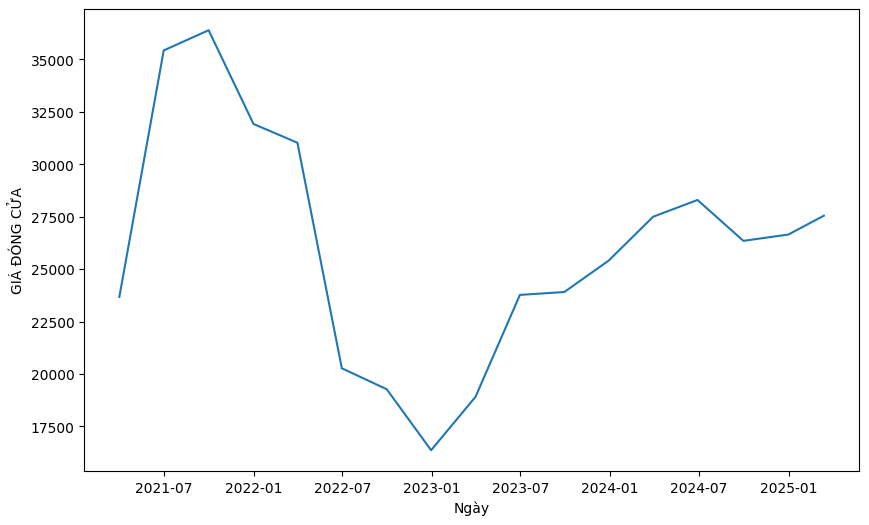

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=price_history_sub,x='Ngày',y='GIÁ ĐÓNG CỬA')
plt.show()

In [ ]:
#gop bang